In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 19.1 MB/s 
     |████████████████████████████████| 209 kB 61.8 MB/s 
     |████████████████████████████████| 81 kB 10.2 MB/s 
     |████████████████████████████████| 78 kB 3.4 MB/s 
     |████████████████████████████████| 147 kB 49.4 MB/s 
     |████████████████████████████████| 112 kB 13.1 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=07825e96fdeb868a4a6357b5b4b09e129d69f39d74cf7ee74837eb61a7182b87
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [1]:
from __future__ import print_function, division
import os
import torch as T
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torchvision import datasets
from torchvision import transforms
from torchvision import transforms, utils
from torch import nn
from sklearn.preprocessing import StandardScaler
#import optuna
#from optuna.trial import TrialState
from sklearn.model_selection import train_test_split


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_full = pd.read_csv("full_dataset_with_int_map.csv", index_col=None)
X = df_full.iloc[:, 1:22]
y = df_full.loc[:, "throughput"]

In [13]:
data = pd.read_csv('fin-train.csv',delimiter=',')#Enter the location of the preprocessed training data

X = data.loc[:, ['wlan_code_index','node_type','x(m)','y(m)','primary_channel','min_channel_allowed',
                       'max_channel_allowed','RSSI','SINR','average_airtime', 'average_interference']].values
y = data.loc[:,"throughput"].values


In [14]:
device = 'cuda' if T.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [ ]:
import urllib

import optuna
import sklearn
from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

N_TRAIN_EXAMPLES = 5550
N_VALID_EXAMPLES = 1850
BATCHSIZE = 128
CLASSES = 1
EPOCHS = 10


def objective(trial):
    # Clear clutter from previous tf.keras session graphs.
    clear_session()

    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    X_train_scale = sc.fit_transform(X_train)
    X_test_scale = sc.transform(X_test)
    

    model = Sequential()
    model.add(Dense(trial.suggest_int("n_units_l{}".format(0), 32, 1024), activation="relu"))
    model.add(Dense(trial.suggest_int("n_units_l{}".format(1), 32, 1024), activation="relu"))
    model.add(Dense(trial.suggest_int("n_units_l{}".format(2), 32, 1024), activation="relu"))
    model.add(Dense(trial.suggest_int("n_units_l{}".format(3), 32, 1024), activation="relu"))
    model.add(Dense(1, activation="relu"))


    # We compile our model with a sampled learning rate.
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    model.compile(
        loss="mean_squared_error",
        optimizer=Adam(learning_rate=learning_rate),
        metrics=["mean_squared_error","mean_absolute_error"],
    )

    model.fit(
        X_train_scale,
        y_train,
        validation_data=(X_test_scale, y_test),
        shuffle=True,
        batch_size=BATCHSIZE,
        epochs=EPOCHS,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    pred_y = model.predict(X_test_scale)
    r2 = sklearn.metrics.r2_score(pred_y, y_test)
    return r2


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2022-08-04 07:43:46,714] A new study created in memory with name: no-name-e5a859a2-0ce2-4521-a675-5f891294f00a
[I 2022-08-04 07:44:03,286] Trial 0 finished with value: 0.9567144907760774 and parameters: {'n_units_l0': 949, 'n_units_l1': 447, 'n_units_l2': 704, 'n_units_l3': 329, 'learning_rate': 0.0008430508472070481}. Best is trial 0 with value: 0.9567144907760774.
[I 2022-08-04 07:44:19,601] Trial 1 finished with value: 0.0 and parameters: {'n_units_l0': 739, 'n_units_l1': 856, 'n_units_l2': 221, 'n_units_l3': 977, 'learning_rate': 0.030426921606847752}. Best is trial 0 with value: 0.9567144907760774.
[I 2022-08-04 07:44:35,425] Trial 2 finished with value: 0.9506593635252801 and parameters: {'n_units_l0': 832, 'n_units_l1': 60, 'n_units_l2': 361, 'n_units_l3': 488, 'learning_rate': 0.0021304377861830225}. Best is trial 0 with value: 0.9567144907760774.
[I 2022-08-04 07:44:57,299] Trial 3 finished with value: 0.9597191888446857 and parameters: {'n_units_l0': 630, 'n_units_l1': 46,

Number of finished trials: 33
Best trial:
  Value: 0.9631248518618242
  Params: 
    n_units_l0: 445
    n_units_l1: 387
    n_units_l2: 618
    n_units_l3: 618
    learning_rate: 0.00034958236523293957


In [15]:
import urllib

import sklearn
from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [ ]:
import urllib

import optuna
import sklearn
from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

N_TRAIN_EXAMPLES = 5550
N_VALID_EXAMPLES = 1850
BATCHSIZE = 128
CLASSES = 1
EPOCHS = 10


def objective(trial):
    # Clear clutter from previous tf.keras session graphs.
    clear_session()

    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    X_train_scale = sc.fit_transform(X_train)
    X_test_scale = sc.transform(X_test)
    

    model = Sequential()
    model.add(Dense(trial.suggest_int("n_units_l{}".format(0), 32, 1024), activation="relu"))
    model.add(Dense(trial.suggest_int("n_units_l{}".format(1), 32, 1024), activation="relu"))
    model.add(Dense(trial.suggest_int("n_units_l{}".format(2), 32, 1024), activation="relu"))
    model.add(Dense(trial.suggest_int("n_units_l{}".format(3), 32, 1024), activation="relu"))
    model.add(Dense(1, activation="relu"))


    # We compile our model with a sampled learning rate.
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    model.compile(
        loss="mean_squared_error",
        optimizer=Adam(learning_rate=learning_rate),
        metrics=["mean_squared_error","mean_absolute_error"],
    )

    model.fit(
        X_train_scale,
        y_train,
        validation_data=(X_test_scale, y_test),
        shuffle=True,
        batch_size=BATCHSIZE,
        epochs=EPOCHS,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    pred_y = model.predict(X_test_scale)
    r2 = sklearn.metrics.r2_score(pred_y, y_test)
    return r2


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [23]:
BATCHSIZE = 128
CLASSES = 1
EPOCHS = 30

In [17]:
import math

In [24]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

model = Sequential()
model.add(Dense(445, activation="relu"))
model.add(Dense(387, activation="relu"))
model.add(Dense(618, activation="relu"))
model.add(Dense(618, activation="relu"))
model.add(Dense(1, activation="relu"))


# We compile our model with a sampled learning rate.
learning_rate = 0.00034958236523293957
model.compile(
    loss="mean_squared_error",
    optimizer=Adam(learning_rate=learning_rate),
    metrics=["mean_squared_error","mean_absolute_error"],
)

history = model.fit(
    X_train_scale,
    y_train,
    validation_data=(X_test_scale, y_test),
    shuffle=True,
    batch_size=BATCHSIZE,
    epochs=EPOCHS,
    verbose=False,
)

# Evaluate the model accuracy on the validation set.
pred_y = model.predict(X_test_scale)
r2 = sklearn.metrics.r2_score(pred_y, y_test)
print(r2, math.sqrt(sklearn.metrics.mean_squared_error(pred_y, y_test)))


0.9484485749749986 5.415807504848353


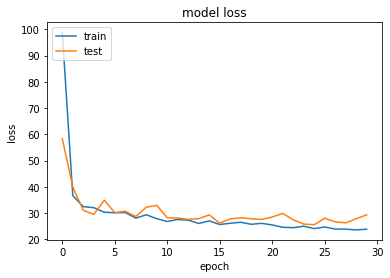

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [ ]:
print(r2, math.sqrt(sklearn.metrics.mean_squared_error(pred_y, y_test)))

0.9638129381515405 4.891489784603009


In [ ]:
pred_y_tr = model.predict(X_train_scale)
print(r2, math.sqrt(sklearn.metrics.mean_squared_error(pred_y_tr, y_train)))

0.9638129381515405 4.229699006767452
